In [16]:
import os
import foldrpp
from collections import defaultdict
import regex as re

    
person_model = foldrpp.load_model_from_file('../fold-rpp-models/person_model_final_fr.txt')

print("Person model ruleset: ")
# print ruleset
for r in person_model.asp():
    print(r)
print()

backpack_model = foldrpp.load_model_from_file('../fold-rpp-models/backpack_model_final_fr.txt')

def is_valid_model(model: foldrpp.Foldrpp):
    return len(model.asp() ) > 0

def get_valid_models():
    for file in os.listdir('../fold-rpp-models'):
        if file.endswith('.txt'):
            model = foldrpp.load_model_from_file('../fold-rpp-models/' + file)
            if is_valid_model(model):
                yield model
            
valid_models = list(get_valid_models())

print("hi")
# Regex pattern to match voxel names
pattern = re.compile(r'\b([a-z0-9]+(?:_?\d*)-\d+)\b')

# Dictionary to count occurrences
frequency_dict = defaultdict(int)    

model_to_unique_voxel_counts = {}

voxel_name_to_model_names = defaultdict(list)

for model in valid_models:
        model_frequency_dict = defaultdict(int)
        print()
        i = 0
        model_name = ""
        for r in model.asp():
            if i == 0:
                # all characters up to the first '('
                model_name = r[:r.find('(')]
                
            i += 1
            print(r)
            
            # Parse and count
            matches = pattern.findall(r)
            for match in matches:
                frequency_dict[match] += 1  
                model_frequency_dict[match] += 1
                if not model_name in voxel_name_to_model_names[match]:
                    voxel_name_to_model_names[match].append(model_name) 
            # print(f"matches: {matches} for rule: {r}")                                                              
        print()        
        print(f"Model uses {len(model_frequency_dict)} unique voxels")
        print()  
        
        model_to_unique_voxel_counts[model_name] = len(model_frequency_dict)

Person model ruleset: 
person(X,'1') :- not ffa_2-151(X,'0'), not ab7(X,'True'), not ab8(X,'True'), not ab9(X,'True').
ab1(X,'True') :- not v2v-710(X,'0'), ffa_2-276(X,'0'), v1v-118(X,'0').
ab2(X,'True') :- not ffa_2-309(X,'0'), v1v-311(X,'0'), v1v-174(X,'0'), not ab1(X,'True').
ab3(X,'True') :- v1d-401(X,'0'), v1v-24(X,'0').
ab4(X,'True') :- not ffa_2-227(X,'0'), not ffa_1-360(X,'0'), not ab3(X,'True').
ab5(X,'True') :- not v1d-48(X,'0'), not v1v-74(X,'0').
ab6(X,'True') :- v3d-431(X,'0'), not v1v-24(X,'0').
ab7(X,'True') :- ffa_2-155(X,'0'), not ffa_1-454(X,'0'), ffa_2-22(X,'0'), ffa_1-383(X,'0'), v1v-61(X,'0'), atl_faces-26(X,'0'), not ab2(X,'True'), not ab4(X,'True'), not ab5(X,'True'), not ab6(X,'True').
ab8(X,'True') :- not ffa_2-160(X,'0'), ffa_1-454(X,'0'), not v3v-470(X,'0'), v1v-24(X,'0').
ab9(X,'True') :- not ffa_2-160(X,'0'), ffa_1-454(X,'0'), not ffa_2-304(X,'0'), not v3v-519(X,'0'), not v1v-56(X,'0').

hi

airplane(X,'1') :- v1v-283(X,'0'), v1d-367(X,'0'), not v1v-220(X,'

In [18]:
# visualize voxel_name to model names
    
import seaborn as sns
import pandas as pd

# use catplot to visualize the model names used by each voxel

voxel_name_to_model_names_list = []
for voxel_name, model_names in voxel_name_to_model_names.items():
    for model_name in model_names:
        voxel_name_to_model_names_list.append((voxel_name, model_name))
        
df = pd.DataFrame(voxel_name_to_model_names_list, columns=['Voxel', 'Model'])

df

,Voxel,Model
0,v1v-283,airplane
1,v1v-283,bear
2,v1v-283,boat
3,v1v-283,cow
4,v1v-283,dining_table
...,...,...
634,v1v-407,tv
635,ofa-2,tv
636,v1v-208,tv
637,v2v-667,wine_glass


         Voxel  Count
44   ffa_2-151     22
13   ffa_1-282      8
259      v1v-7      7
28   ffa_1-454      7
43   ffa_2-147      6


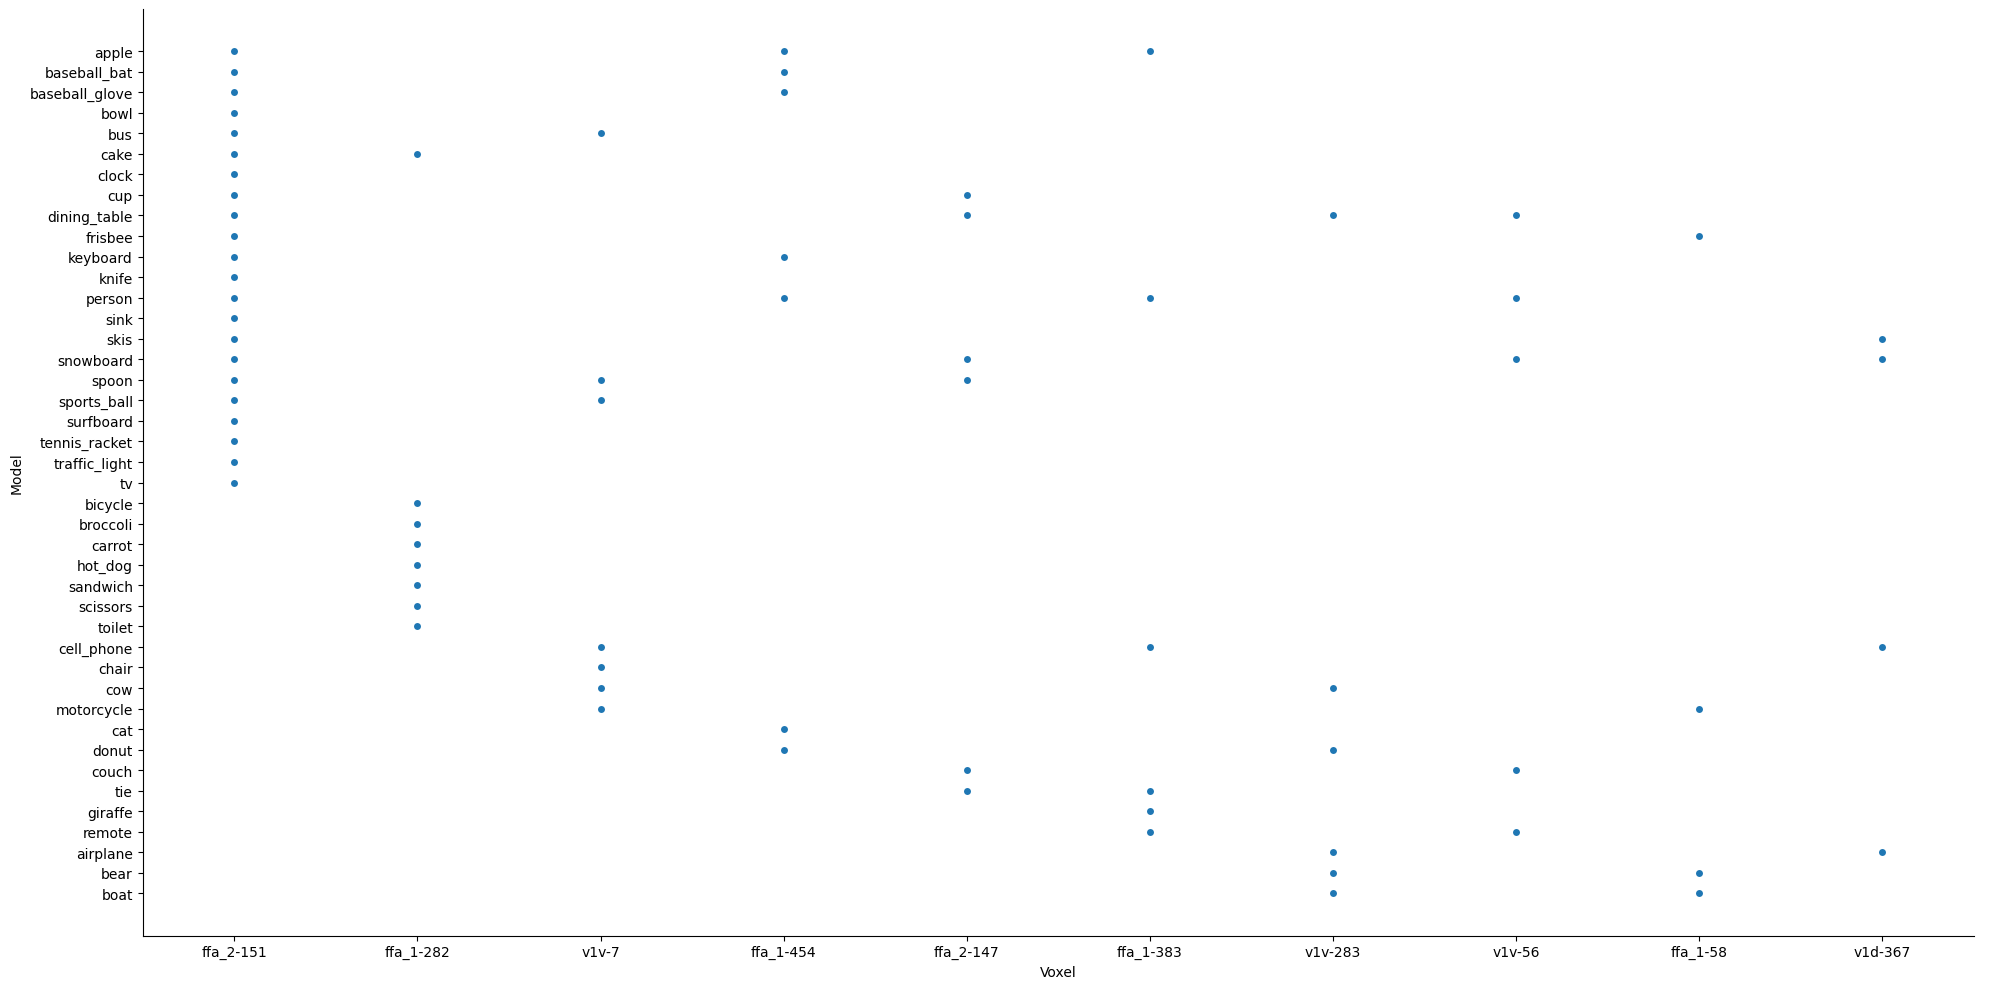

In [22]:
# visualize the top k model/category names that each voxel was used for

k = 10

top_k_df = df.groupby('Voxel').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(k)

print(top_k_df.head())

top_k_df_with_models = top_k_df.merge(df, on='Voxel')

sns.catplot(x='Voxel', y='Model', data=top_k_df_with_models, kind='swarm', height=10, aspect=2)

In [3]:
top_k = 15

# Sort the dictionary by value
sorted_dict = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top k
for i, (voxel, count) in enumerate(sorted_dict):
    if i == top_k:
        break
    print(f"{voxel}: {count}")

# print models to unique voxel counts
print()
print("Models to unique voxel counts")
for model, count in model_to_unique_voxel_counts.items():
    print(f"{model}: {count}")

print(f"Total number of unique voxels: {len(frequency_dict)}")

print(f"Average number of unique voxels per model: {sum(model_to_unique_voxel_counts.values()) / len(model_to_unique_voxel_counts)}")

print(f"There are {len(valid_models)} valid models")

ffa_2-151: 61
ffa_1-282: 21
ffa_1-383: 17
ffa_1-454: 16
v1v-283: 15
v3v-217: 15
v1d-367: 13
ffa_1-316: 12
ofa-37: 11
ffa_2-121: 9
ffa_2-147: 8
ffa_1-196: 8
ffa_1-58: 7
ofa-344: 7
v1v-7: 7

Models to unique voxel counts
airplane: 6
apple: 16
baseball_bat: 8
baseball_glove: 17
bear: 4
bench: 10
bicycle: 11
bird: 26
boat: 12
book: 5
bowl: 5
broccoli: 5
bus: 16
cake: 4
carrot: 4
car: 10
cat: 8
cell_phone: 19
chair: 5
clock: 11
couch: 12
cow: 5
cup: 4
dining_table: 12
dog: 10
donut: 13
elephant: 4
frisbee: 4
giraffe: 6
hair_drier: 4
handbag: 14
horse: 6
hot_dog: 9
keyboard: 15
kite: 7
knife: 5
laptop: 5
motorcycle: 19
person: 24
refrigerator: 22
remote: 32
sandwich: 11
scissors: 5
sheep: 8
sink: 30
skis: 15
snowboard: 21
spoon: 5
sports_ball: 21
surfboard: 9
tennis_racket: 15
tie: 4
toilet: 9
toothbrush: 16
traffic_light: 8
train: 14
tv: 11
wine_glass: 3
Total number of unique voxels: 455
Average number of unique voxels per model: 11.017241379310345
There are 58 valid models


## Create pie chart + bar graph

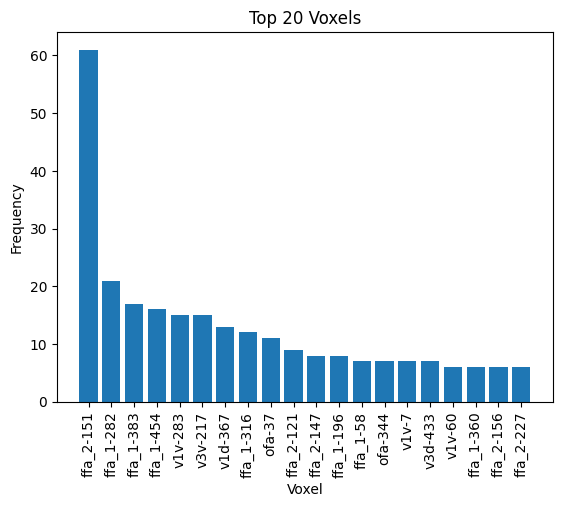

In [7]:

import matplotlib.pyplot as plt

# Plot the top k voxels
top_k = 20
    
# Get the top k voxels
top_k_voxels = [voxel for voxel, count in sorted_dict[:top_k]]
top_k_counts = [count for voxel, count in sorted_dict[:top_k]]

plt.bar(top_k_voxels, top_k_counts)
plt.xlabel('Voxel')
plt.ylabel('Frequency')
plt.title(f'Top {top_k} Voxels')
plt.xticks(rotation=90)
plt.show()

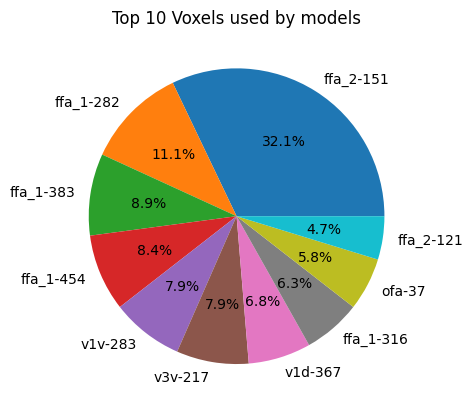

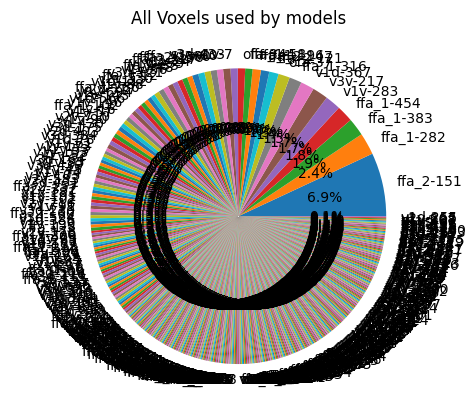

In [12]:
# pie chart using top_k_voxels and top_k_counts

top_k = 10

top_k_voxels = [voxel for voxel, count in sorted_dict[:top_k]]
top_k_counts = [count for voxel, count in sorted_dict[:top_k]]

plt.pie(top_k_counts, labels=top_k_voxels, autopct='%1.1f%%')
plt.title(f'Top {top_k} Voxels used by models')
plt.show()